In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [197]:
train_df=pd.read_csv('/Users/y2z/Desktop/titanic/train.csv')
test_df=pd.read_csv('/Users/y2z/Desktop/titanic/test.csv')

In [198]:
train_df.shape

(891, 12)

In [199]:
test_df.shape

(418, 11)

In [200]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [201]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [202]:
combine=[train_df,test_df]

In [203]:
df_1=train_df[train_df['Pclass']==1][['Survived','Sex','Embarked','Pclass']]
df_1_sex=df_1.groupby('Sex')['Survived'].sum()

In [204]:
df_1.head()

,Survived,Sex,Embarked,Pclass
1,1,female,C,1
3,1,female,S,1
6,0,male,S,1
11,1,female,S,1
23,1,male,S,1


In [205]:
df_1_sex

Sex
female    91
male      45
Name: Survived, dtype: int64

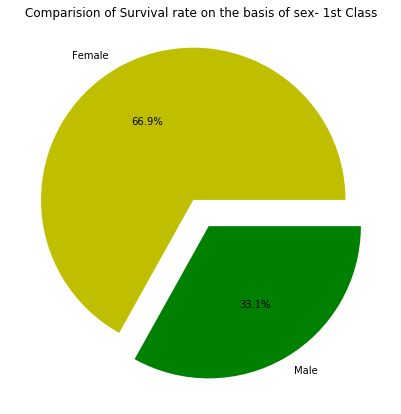

In [206]:
plt.figure(figsize=(7,7))
slices=[91,45]
labels=['Female','Male']
plt.pie(slices,labels=labels,explode=[.1,.1],colors=['y','g'],autopct='%1.1f%%')
plt.title('Comparision of Survival rate on the basis of sex- 1st Class')
plt.show()

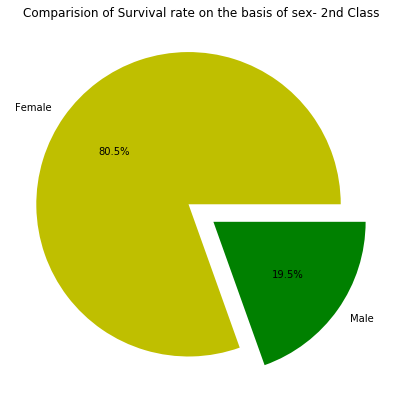

In [207]:
df_2=train_df[train_df['Pclass']==2][['Survived','Sex','Embarked','Pclass']]
df_2_sex=df_2.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(7,7))
slices=[70,17]
labels=['Female','Male']
plt.pie(slices,labels=labels,explode=[.1,.1],colors=['y','g'],autopct='%1.1f%%')
plt.title('Comparision of Survival rate on the basis of sex- 2nd Class')
plt.show()

In [208]:
df_2_sex

Sex
female    70
male      17
Name: Survived, dtype: int64

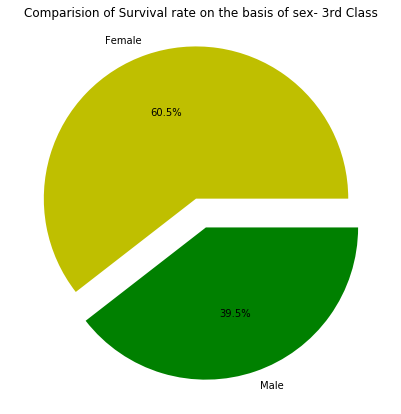

In [209]:
df_3=train_df[train_df['Pclass']==3][['Survived','Sex','Embarked','Pclass']]
df_3_sex=df_3.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(7,7))
slices=[72,47]
labels=['Female','Male']
plt.pie(slices,labels=labels,explode=[.1,.1],colors=['y','g'],autopct='%1.1f%%')
plt.title('Comparision of Survival rate on the basis of sex- 3rd Class')
plt.show()

In [210]:
df_3_sex

Sex
female    72
male      47
Name: Survived, dtype: int64

In [267]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
df_sex_o=train_df[['Survived','Sex']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

In [269]:
df_sex_o

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [270]:
df_class_o=train_df[['Survived','Pclass']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

In [271]:
df_class_o

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


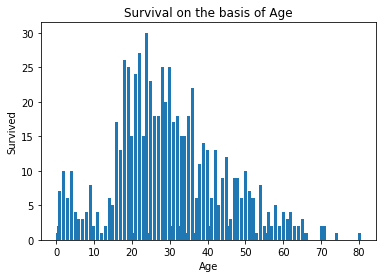

In [272]:
df_age=train_df[['Age','Survived']].groupby('Age',as_index=False).count().sort_values(by='Survived',ascending=False)
plt.bar(x='Age',height='Survived',data=df_age)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Survival on the basis of Age")
plt.show()

In [273]:
df_age.head()

,Age,Survived
31,24.0,30
28,22.0,27
23,18.0,26
39,30.0,25
36,28.0,25


In [274]:
df_age_gen=train_df[['Survived','Age','Sex']]
df_age_m=df_age_gen[df_age_gen['Sex']=='male']
df_age_f=df_age_gen[df_age_gen['Sex']=='female']

In [275]:
df_age_m.shape

(577, 3)

In [276]:
df_age_f.shape

(314, 3)

In [277]:
train_df.shape

(891, 12)

In [278]:
df_age_m=df_age_m.groupby('Age',as_index=False).count().sort_values(by='Survived',ascending=False)


In [279]:
df_age_m.drop('Sex',axis=1,inplace=True)

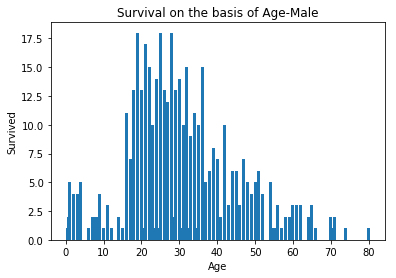

In [280]:
plt.bar(x='Age',height='Survived',data=df_age_m)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Survival on the basis of Age-Male")
plt.show()

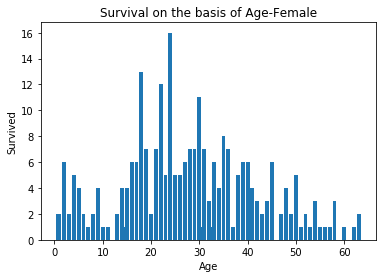

In [281]:
df_age_f=df_age_f.groupby('Age',as_index=False).count().sort_values(by='Survived',ascending=False)
df_age_f.drop('Sex',axis=1,inplace=True)
plt.bar(x='Age',height='Survived',data=df_age_f)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Survival on the basis of Age-Female")
plt.show()

In [335]:
df_css=train_df[train_df['Survived']==1]

In [336]:
df_css=df_css[df_css['Sex']=='male']
df_css=df_css[df_css['Pclass']==1]

In [337]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [338]:
train_df_2=train_df.dropna()

In [339]:
train_df.shape,train_df_2.shape

((891, 12), (183, 12))

# grid=sns.FacetGrid(train_df,row='Pclass',col='Sex')
grid.map(plt.hist,'Age')
plt.show()

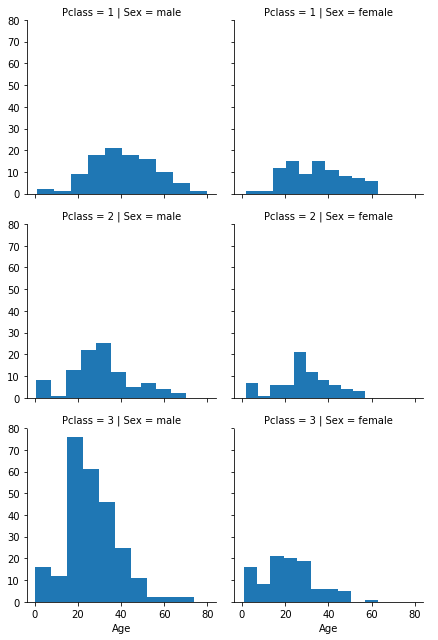

In [340]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex')
grid.map(plt.hist,'Age')
grid.add_legend()
plt.show()
test_df_2=test_df.dropna()

In [341]:
X_train=train_df_2.drop('Survived',axis=1)
Y_train=train_df_2['Survived']
X_test=test_df_2.drop("PassengerId",axis=1).copy()

In [342]:
from sklearn.linear_model import LogisticRegressio1n

In [345]:
logreg=LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred=logreg.predict(X_test)
